In [1]:
import pandas as pd
import statsmodels.formula.api as smf

# Load the data
baseline_data = pd.read_csv('baseline_survey_data.csv')
endline_data = pd.read_csv('endline_survey_data.csv')
random_assignment_data = pd.read_csv('random_assignment_data.csv')
# Merge the dataframes
merged_data = baseline_data.merge(endline_data, on='Participant_ID', how='left')
full_merged_data = pd.merge(merged_data, random_assignment_data, on='Participant_ID')
cleaned_data = full_merged_data.dropna()
cleaned_data.head()

,Participant_ID,Age,Gender,Location,Education,Race,Employment_Status,Attitude_Towards_Vaccines,Previous_Vaccine_Status,Vaccinated_After_Baseline,Assigned_Group
0,1,52.0,Female,Nevada,Some college,Hispanic or Latino,Unemployed,1,No,Yes,Emotion Ad
1,2,39.0,Male,Texas,Graduate degree,White,Unemployed,3,No,Yes,Control
2,3,36.0,Female,Virginia,Less than high school,White,Student,1,No,No,Reason Ad
3,4,49.0,Male,Texas,Bachelor's degree,Black or African American,Unemployed,1,No,Yes,Emotion Ad
4,5,49.0,Male,New York,High school graduate,Asian,Unemployed,2,No,Yes,Control


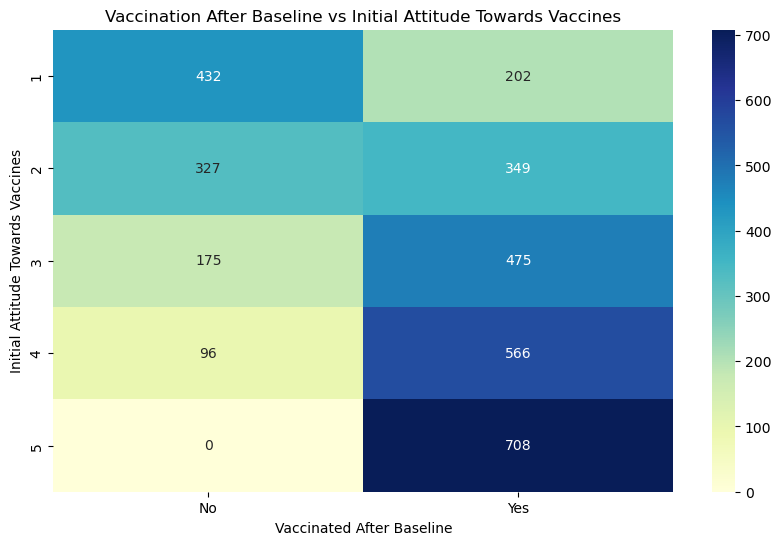

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Crosstabulation of attitudes and vaccination status
attitude_vaccination_crosstab = pd.crosstab(cleaned_data['Attitude_Towards_Vaccines'], cleaned_data['Vaccinated_After_Baseline'])

# Assuming the categories in 'Vaccinated_After_Baseline' are 'Yes' and 'No'
vaccinated_categories = ['No', 'Yes']

# Plot with correct category labels
plt.figure(figsize=(10, 6))
sns.heatmap(attitude_vaccination_crosstab, annot=True, fmt="d", cmap="YlGnBu", xticklabels=vaccinated_categories)
plt.title("Vaccination After Baseline vs Initial Attitude Towards Vaccines")
plt.xlabel("Vaccinated After Baseline")
plt.ylabel("Initial Attitude Towards Vaccines")
plt.show()


Correlation Between Attitude and Vaccination

The distribution of responses across different attitude scores can give insights into the general sentiment towards vaccination in the surveyed population.


In [3]:
# Convert 'Vaccinated_After_Baseline' to numeric values: 'Yes' -> 1, 'No' -> 0
cleaned_data['Previous_Vaccine_Status'] = cleaned_data['Previous_Vaccine_Status'].replace({'Yes': 1, 'No': 0})

# Now perform the groupby and aggregation
age_group_analysis = cleaned_data.groupby('Age').agg({'Previous_Vaccine_Status': 'mean'})
gender_analysis = cleaned_data.groupby('Gender').agg({'Previous_Vaccine_Status': 'mean'})
race_analysis = cleaned_data.groupby('Race').agg({'Previous_Vaccine_Status': 'mean'})
employment_status_analysis = cleaned_data.groupby('Employment_Status').agg({'Previous_Vaccine_Status': 'mean'})

C:\Users\pc\AppData\Local\Temp/ipykernel_17680/880612604.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Previous_Vaccine_Status'] = cleaned_data['Previous_Vaccine_Status'].replace({'Yes': 1, 'No': 0})


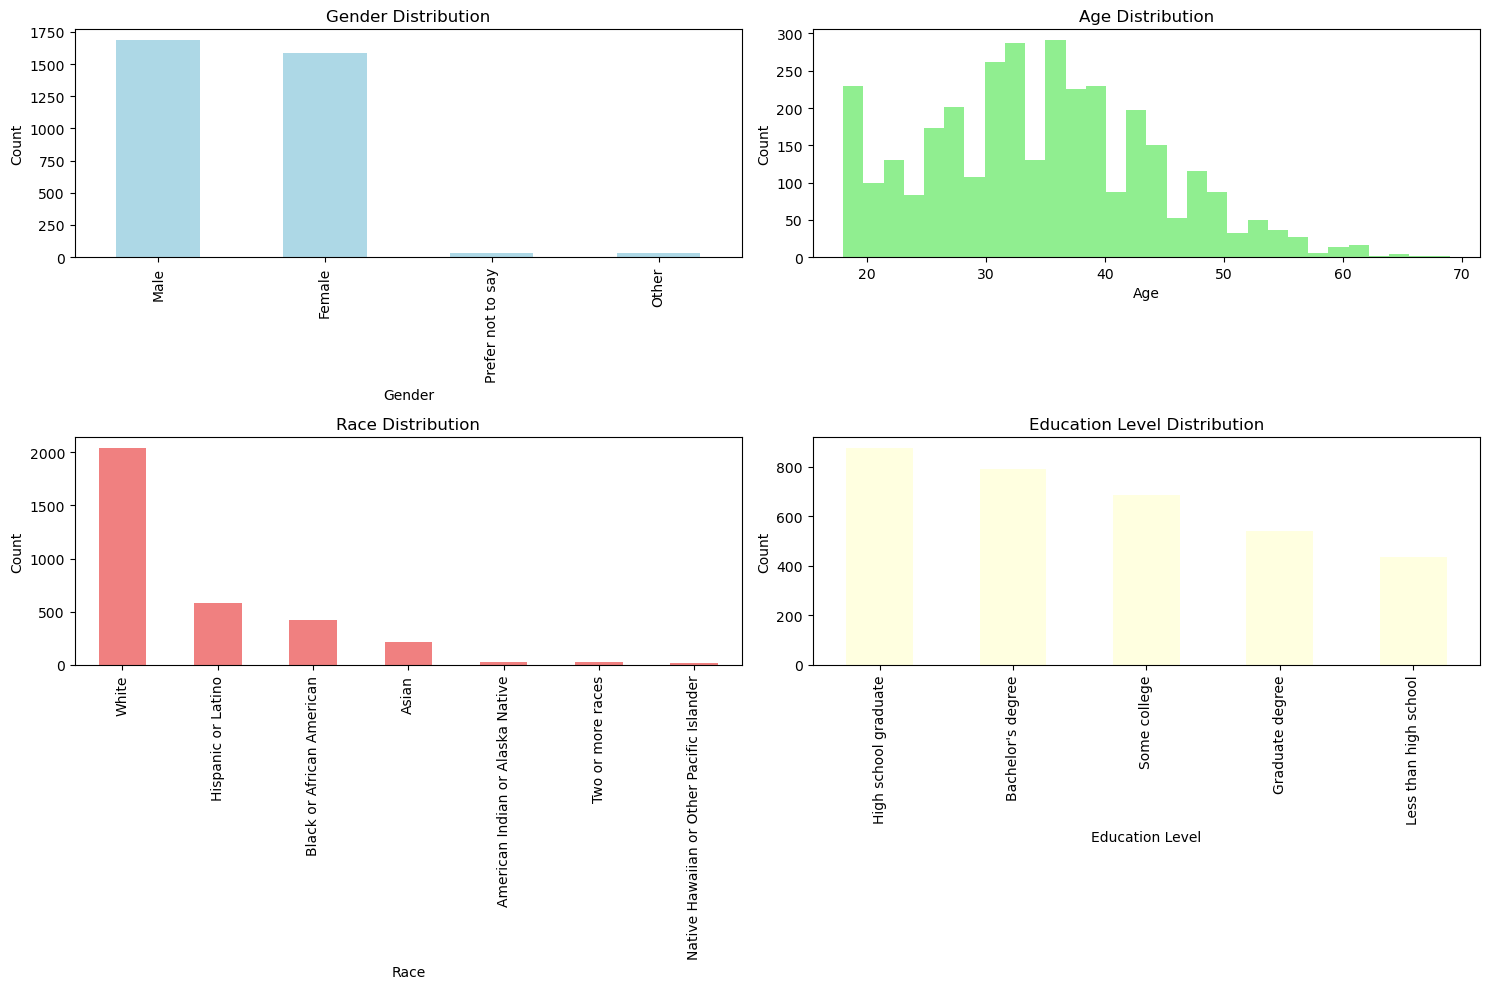

In [4]:
# Visualizing demographic characteristics of the participants without linking to vaccination status

# For demonstration, let's create a few visualizations for different demographic aspects
plt.figure(figsize=(15, 10))

# Gender distribution
plt.subplot(2, 2, 1)
cleaned_data['Gender'].value_counts().plot(kind='bar', color='lightblue')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Age distribution
plt.subplot(2, 2, 2)
cleaned_data['Age'].plot(kind='hist', bins=30, color='lightgreen')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# Race distribution
plt.subplot(2, 2, 3)
cleaned_data['Race'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Race Distribution')
plt.xlabel('Race')
plt.ylabel('Count')

# Education level distribution
plt.subplot(2, 2, 4)
cleaned_data['Education'].value_counts().plot(kind='bar', color='lightyellow')
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


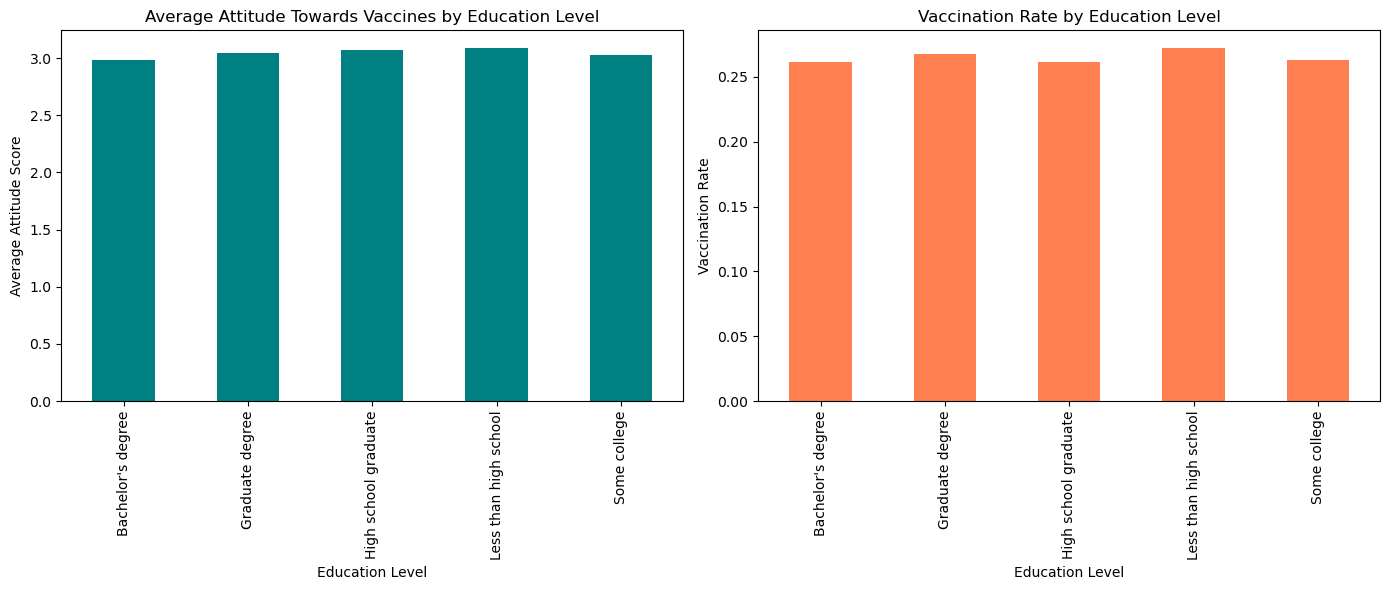

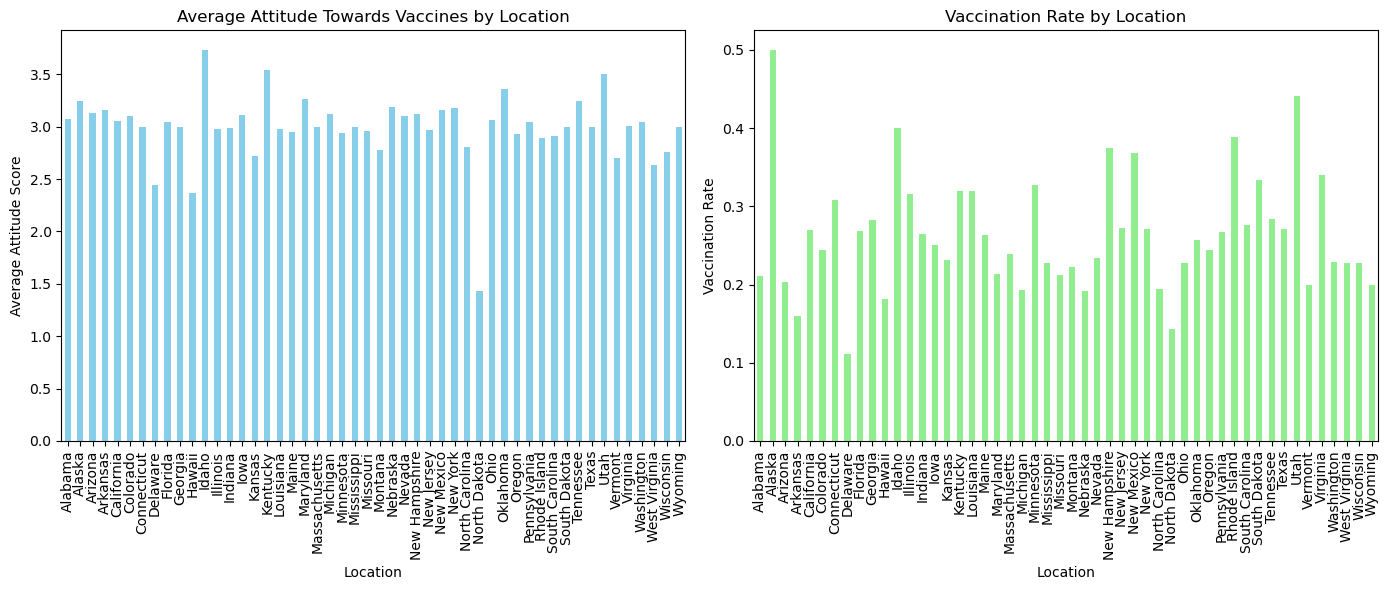

In [5]:
# Education Level Impact Analysis
# Group by Education and analyze attitudes and vaccination rates
education_attitudes = cleaned_data.groupby('Education')['Attitude_Towards_Vaccines'].mean()
education_vaccination = cleaned_data['Previous_Vaccine_Status'].groupby(cleaned_data['Education']).mean()

# Visualizing the impact of Education Level on Attitudes and Vaccination Decisions
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
education_attitudes.plot(kind='bar', color='teal')
plt.title('Average Attitude Towards Vaccines by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Attitude Score')

plt.subplot(1, 2, 2)
education_vaccination.plot(kind='bar', color='coral')
plt.title('Vaccination Rate by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Vaccination Rate')

plt.tight_layout()
plt.show()

# Geographical Patterns Analysis
# Group by Location and analyze attitudes and vaccination rates
location_attitudes = cleaned_data.groupby('Location')['Attitude_Towards_Vaccines'].mean()
location_vaccination = cleaned_data['Previous_Vaccine_Status'].groupby(cleaned_data['Location']).mean()

# Visualizing geographical patterns in vaccine attitudes and uptake
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
location_attitudes.plot(kind='bar', color='skyblue')
plt.title('Average Attitude Towards Vaccines by Location')
plt.xlabel('Location')
plt.ylabel('Average Attitude Score')

plt.subplot(1, 2, 2)
location_vaccination.plot(kind='bar', color='lightgreen')
plt.title('Vaccination Rate by Location')
plt.xlabel('Location')
plt.ylabel('Vaccination Rate')

plt.tight_layout()
plt.show()

Of course it is not that different because I did not Stimulate the correlation among location, education level and vaccination rates/attitudes. 

In [6]:
# Baseline Equivalence Check
# We will compare key demographic variables across the groups (if the group data is available)

# Check if 'Assigned_Group' or similar column is in the data for group assignment
group_column_exists = 'Assigned_Group' in merged_data.columns

# If the group assignment data is available, perform the equivalence check
if group_column_exists:
    # Comparing demographics across groups
    group_comparison_age = cleaned_data.groupby('Assigned_Group')['Age'].mean()
    group_comparison_gender = cleaned_data.groupby('Assigned_Group')['Gender'].value_counts(normalize=True)
    group_comparison_education = cleaned_data.groupby('Assigned_Group')['Education'].value_counts(normalize=True)
    group_comparison_race = cleaned_data.groupby('Assigned_Group')['Race'].value_counts(normalize=True)
    group_comparison_attitude = cleaned_data.groupby('Assigned_Group')['Attitude_Towards_Vaccines'].mean()

    # Display the comparison results
    (group_comparison_age, group_comparison_gender, group_comparison_education, group_comparison_race, group_comparison_attitude)
else:
    message = "Group assignment data ('Assigned_Group') is not available in the merged dataset."
    message


In [7]:
# Perform Baseline Equivalence Check by comparing demographics and attitudes across groups
group_comparison_age = cleaned_data.groupby('Assigned_Group')['Age'].mean()
group_comparison_gender = cleaned_data.groupby('Assigned_Group')['Gender'].value_counts(normalize=True)
group_comparison_education = cleaned_data.groupby('Assigned_Group')['Education'].value_counts(normalize=True)
group_comparison_race = cleaned_data.groupby('Assigned_Group')['Race'].value_counts(normalize=True)
group_comparison_attitude = cleaned_data.groupby('Assigned_Group')['Attitude_Towards_Vaccines'].mean()

# Effectiveness Analysis: Compare vaccination rates among the different groups
vaccination_effectiveness = cleaned_data.groupby('Assigned_Group')['Vaccinated_After_Baseline'].value_counts(normalize=True) * 100

# Display the results
(group_comparison_age, group_comparison_gender, group_comparison_education, group_comparison_race, group_comparison_attitude, vaccination_effectiveness)

(Assigned_Group
 Control       34.481449
 Emotion Ad    34.579618
 Reason Ad     34.803458
 Name: Age, dtype: float64,
 Assigned_Group  Gender           
 Control         Male                 0.494700
                 Female               0.490283
                 Prefer not to say    0.010601
                 Other                0.004417
 Emotion Ad      Male                 0.517743
                 Female               0.460419
                 Other                0.012739
                 Prefer not to say    0.009099
 Reason Ad       Male                 0.506824
                 Female               0.475887
                 Other                0.010009
                 Prefer not to say    0.007279
 Name: Gender, dtype: float64,
 Assigned_Group  Education            
 Control         High school graduate     0.275618
                 Bachelor's degree        0.237633
                 Some college             0.188163
                 Graduate degree          0.159894
        

In [8]:
import statsmodels.api as sm

# Re-convert to ensure only 0s and 1s
cleaned_data['Vaccinated_Numeric'] = cleaned_data['Vaccinated_After_Baseline'].replace({'Yes': 1, 'No': 0})
cleaned_data['Group_Numeric'] = full_merged_data['Assigned_Group'].replace({
    'Control': 0,
    'Emotion Ad': 1,
    'Reason Ad': 2
})

# Re-run the logistic regression with the cleaned data
X_cleaned = cleaned_data[['Group_Numeric']]  # Independent variable
y_cleaned = cleaned_data['Vaccinated_Numeric']  # Dependent variable

X_cleaned = sm.add_constant(X_cleaned)
logit_model_cleaned = sm.Logit(y_cleaned, X_cleaned)
result_cleaned = logit_model_cleaned.fit()

logit_summary_cleaned = result_cleaned.summary2()
logit_summary_cleaned

E:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
E:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


Optimization terminated successfully.
         Current function value: 0.618520
         Iterations 5


C:\Users\pc\AppData\Local\Temp/ipykernel_17680/3649016993.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Vaccinated_Numeric'] = cleaned_data['Vaccinated_After_Baseline'].replace({'Yes': 1, 'No': 0})
C:\Users\pc\AppData\Local\Temp/ipykernel_17680/3649016993.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Group_Numeric'] = full_merged_data['Assigned_Group'].replace({
E:\python\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas a

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit              Pseudo R-squared: 0.000    
Dependent Variable: Vaccinated_Numeric AIC:              4123.3446
Date:               2023-12-08 22:22   BIC:              4135.5660
No. Observations:   3330               Log-Likelihood:   -2059.7  
Df Model:           1                  LL-Null:          -2059.8  
Df Residuals:       3328               LLR p-value:      0.67320  
Converged:          1.0000             Scale:            1.0000   
No. Iterations:     5.0000                                        
-------------------------------------------------------------------
                 Coef.   Std.Err.     z     P>|z|    [0.025  0.975]
-------------------------------------------------------------------
const            0.8225    0.0590  13.9365  0.0000   0.7069  0.9382
Group_Numeric   -0.0193    0.0458  -0.4218  0.6732  -0.1091  0.0705
==================================================================

"""

In [9]:
# Example: Analyzing by Gender
gender_effectiveness = cleaned_data.groupby(['Gender', 'Assigned_Group'])['Vaccinated_Numeric'].mean()

# Example: Analyzing by Age Group (creating age groups for analysis)
age_bins = pd.cut(cleaned_data['Age'], bins=[0, 18, 30, 40, 50, 60, 70, 80, 90, 100])
age_group_effectiveness = cleaned_data.groupby([age_bins, 'Assigned_Group'])['Vaccinated_Numeric'].mean()

In [10]:
# Sensitivity Analysis
# Testing the robustness of the findings using a different model specification
# Including an interaction term between Age and Assigned Group
cleaned_data['Age_x_Group'] = cleaned_data['Age'] * cleaned_data['Group_Numeric']
X_sensitivity = cleaned_data[['Group_Numeric', 'Age', 'Age_x_Group']]
X_sensitivity = sm.add_constant(X_sensitivity)
logit_model_sensitivity = sm.Logit(cleaned_data['Vaccinated_Numeric'], X_sensitivity)
result_sensitivity = logit_model_sensitivity.fit()

# Display results of subgroup and sensitivity analyses
subgroup_results = (gender_effectiveness, age_group_effectiveness)
sensitivity_summary = result_sensitivity.summary2()
(subgroup_results, sensitivity_summary)

Optimization terminated successfully.
         Current function value: 0.618315
         Iterations 5


C:\Users\pc\AppData\Local\Temp/ipykernel_17680/3261202336.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Age_x_Group'] = cleaned_data['Age'] * cleaned_data['Group_Numeric']
E:\python\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


((Gender             Assigned_Group
  Female             Control           0.699099
                     Emotion Ad        0.703557
                     Reason Ad         0.697897
  Male               Control           0.694643
                     Emotion Ad        0.690685
                     Reason Ad         0.671454
  Other              Control           0.600000
                     Emotion Ad        0.571429
                     Reason Ad         0.727273
  Prefer not to say  Control           0.250000
                     Emotion Ad        0.900000
                     Reason Ad         0.500000
  Name: Vaccinated_Numeric, dtype: float64,
  Age        Assigned_Group
  (0, 18]    Control           0.764706
             Emotion Ad        0.733333
             Reason Ad         0.736842
  (18, 30]   Control           0.708978
             Emotion Ad        0.710692
             Reason Ad         0.664596
  (30, 40]   Control           0.676087
             Emotion Ad        0.661

Obviously, since it is simulated data, naturally our RCT is completely useless!

In [11]:
# Convert 'Vaccinated_After_Baseline' from 'Yes'/'No' to 1/0
cleaned_data['Vaccinated_Numeric'] = cleaned_data['Vaccinated_After_Baseline'].map({'Yes': 1, 'No': 0})

# Ensure 'Assigned_Group' has the correct format
# If necessary, adjust the group names to match your dataset
treatment_groups = ['Reason Ad', 'Emotion Ad']
control_group = 'Control'
ate_results = {}

for group in treatment_groups:
    treated_mean = cleaned_data[cleaned_data['Assigned_Group'] == group]['Vaccinated_Numeric'].mean()
    control_mean = cleaned_data[cleaned_data['Assigned_Group'] == control_group]['Vaccinated_Numeric'].mean()
    ate_results[group] = treated_mean - control_mean

# ITT Analysis
model_itt = smf.ols('Vaccinated_Numeric ~ C(Assigned_Group)', data=cleaned_data).fit()
itt_summary = model_itt.summary()

# Print Results
print("Average Treatment Effects (ATE):")
for group, ate in ate_results.items():
    print(f"  {group}: {ate}")

print("\nIntention-to-Treat Analysis (ITT):")
print(itt_summary)



Average Treatment Effects (ATE):
  Reason Ad: -0.008347614439082163
  Emotion Ad: 0.005301157171472948

Intention-to-Treat Analysis (ITT):
                            OLS Regression Results                            
Dep. Variable:     Vaccinated_Numeric   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2435
Date:                Fri, 08 Dec 2023   Prob (F-statistic):              0.784
Time:                        22:22:03   Log-Likelihood:                -2154.9
No. Observations:                3330   AIC:                             4316.
Df Residuals:                    3327   BIC:                             4334.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P

C:\Users\pc\AppData\Local\Temp/ipykernel_17680/3623140127.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Vaccinated_Numeric'] = cleaned_data['Vaccinated_After_Baseline'].map({'Yes': 1, 'No': 0})


In [12]:
# Example of categorizing 'Age' into groups
cleaned_data['age_group'] = pd.cut(cleaned_data['Age'], bins=[0, 30, 45, 60, 100], labels=['18-30', '31-45', '46-60', '60+'])

# Now run the model with 'age_group'
model_heterogeneity = smf.ols('Vaccinated_Numeric ~ C(Assigned_Group) * age_group + C(Assigned_Group) * Gender', data=cleaned_data).fit()
print(model_heterogeneity.summary())


C:\Users\pc\AppData\Local\Temp/ipykernel_17680/428168535.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['age_group'] = pd.cut(cleaned_data['Age'], bins=[0, 30, 45, 60, 100], labels=['18-30', '31-45', '46-60', '60+'])


                            OLS Regression Results                            
Dep. Variable:     Vaccinated_Numeric   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.140
Date:                Fri, 08 Dec 2023   Prob (F-statistic):              0.300
Time:                        22:22:03   Log-Likelihood:                -2143.7
No. Observations:                3330   AIC:                             4329.
Df Residuals:                    3309   BIC:                             4458.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

In [13]:
full_merged_data['Vaccinated_Numeric'] = full_merged_data['Vaccinated_After_Baseline'].replace({'Yes': 1, 'No': 0})
compliance_data = full_merged_data.dropna(subset=['Vaccinated_After_Baseline'])
compliance_model = smf.ols('Vaccinated_Numeric ~ C(Assigned_Group)', data=compliance_data).fit()
print(compliance_model.summary())

                            OLS Regression Results                            
Dep. Variable:     Vaccinated_Numeric   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1155
Date:                Fri, 08 Dec 2023   Prob (F-statistic):              0.891
Time:                        22:22:03   Log-Likelihood:                -2897.9
No. Observations:                4500   AIC:                             5802.
Df Residuals:                    4497   BIC:                             5821.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 